# Bike Sharing Analytics

## Business Questions

- **Question 1:** What are the most and least frequently rented hours?
- **Question 2:** In what season is bike rental peak?
- **Question 3:** How has the company's sales performance been in recent years?
- **Question 4:** How do registered customers compare to casual customers?

- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
- Event and Anomaly Detection:  Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

## Data Wrangling

### Gathering Data

In [2]:
# Load day data
day_df = pd.read_csv('./data/day.csv')
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
# Load hour data
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

##### Data Hari

In [4]:
# Day data information
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Check Duplicate the day data
day_df.duplicated().sum()

0

In [6]:
# Check Missing Value the day data
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# The descriptive statistic from day data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Data Hour

In [8]:
# Hour data information
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Check duplicate the hour data
hour_df.duplicated().sum()

0

In [10]:
# Check Missing Value the hour data
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# The descriptive statistic from day data
hour_df.describe().round(2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


### Cleaning Data

In [12]:
# Drop column when is not using
day_df.drop(['workingday'], axis=1, inplace=True)
hour_df.drop(['workingday'], axis=1, inplace=True)

In [13]:
# Change data type int to categorical 
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    day_df[column] = day_df[column].astype('category')
    hour_df[column] = hour_df[column].astype('category')

In [14]:
# Change data type object to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [15]:
# Check Again
print(f'df_day["dteday"]: {day_df['dteday'].dtypes}')
print(f'df_hour["dteday"]: {hour_df['dteday'].dtypes}')

df_day["dteday"]: datetime64[ns]
df_hour["dteday"]: datetime64[ns]


In [16]:
# Change column name from day data
day_df.rename(columns={
    'yr':'year',
    'mnth':'month',
    'weekday':'one_of_week',
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'cnt':'count_cr',
    'hum':'humidity'
},inplace=True)

In [17]:
# Change column name from hour data

hour_df.rename(columns={
    'yr':'year',
    'hr':'hours',
    'mnth':'month',
    'weekday':'one_of_week', 
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'cnt':'count_cr',
    'hum':'humidity'
},inplace=True)


In [18]:
# Convert season to be categorical
season_mapping = {
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
}

day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)


In [19]:
# Convert month to be categorical
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

In [20]:
# Convert weather_situation to be categorical 
weather_situation_mapping = {
    1:'Clear', 
    2:'Misty', 
    3:'Light_RainSnow', 
    4:'Heavy_RainSnow'
}
day_df['weather_situation'] = day_df['weather_situation'].map(weather_situation_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_situation_mapping)

In [21]:
# Convert one_of_week to be categorical
one_of_week_mapping = {
    0: 'Sunday', 
    1: 'Monday', 
    2: 'Tuesday', 
    3: 'Wednesday', 
    4: 'Thursday', 
    5: 'Friday', 
    6: 'Saturday'
}

day_df['one_of_week'] = day_df['one_of_week'].map(one_of_week_mapping)
hour_df['one_of_week'] = hour_df['one_of_week'].map(one_of_week_mapping)

In [22]:
# Convert year 
year_mapping = {
    0: 2011,
    1: 2012
}
hour_df['year'] = hour_df['year'].map(year_mapping)
day_df['year'] = day_df['year'].map(year_mapping)

In [23]:
# Count Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

Make a new column with name days_category when show a column value weekend or weekdays

In [24]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
one_of_week = [
    "Monday", 
    "Tuesday", 
    "Wednesday", 
    "Thursday", 
    "Friday", 
    "Saturday", 
    "Sunday"
]
def category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(category_days)
day_df["category_days"] = day_df["one_of_week"].apply(category_days)

In [25]:
def classify_humadity(humadity):
    if humadity < 45:
        return "Dry"
    elif humadity >= 45 and humadity < 65:
        return "Normal"
    else:
        return "Humid"
hour_df['humidity_category'] = hour_df['humidity'].apply(classify_humadity) 
day_df['humidity_category'] = day_df['humidity'].apply(classify_humadity)

In [26]:
# Check again
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,0.24,0.2879,81.0,0.0,3,13,16,weekend,Humid
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,0.22,0.2727,80.0,0.0,8,32,40,weekend,Humid
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,0.22,0.2727,80.0,0.0,5,27,32,weekend,Humid
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,0.24,0.2879,75.0,0.0,3,10,13,weekend,Humid
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,0.24,0.2879,75.0,0.0,0,1,1,weekend,Humid


In [27]:
day_df.head()

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Humid
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Humid
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Dry
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,weekdays,Normal
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,weekdays,Dry


## Exploratory Data Analysis (EDA)

### Explore Hour Data

In [28]:
hour_df.describe(include='all').round(2)

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.00,17379,17379,17379.0,17379,17379.00,17379.0,17379,17379,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379,17379
unique,NaN,NaN,4,NaN,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,NaN,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Humid
freq,NaN,NaN,4496,NaN,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.00,2012-01-02 04:08:34.552045568,NaN,2011.5,NaN,11.55,NaN,NaN,NaN,0.50,0.48,62.72,0.19,35.68,153.79,189.46,NaN,NaN
min,1.00,2011-01-01 00:00:00,NaN,2011.0,NaN,0.00,NaN,NaN,NaN,0.02,0.00,0.00,0.00,0.00,0.00,1.00,NaN,NaN
25%,4345.50,2011-07-04 00:00:00,NaN,2011.0,NaN,6.00,NaN,NaN,NaN,0.34,0.33,48.00,0.10,4.00,34.00,40.00,NaN,NaN
50%,8690.00,2012-01-02 00:00:00,NaN,2012.0,NaN,12.00,NaN,NaN,NaN,0.50,0.48,63.00,0.19,17.00,115.00,142.00,NaN,NaN
75%,13034.50,2012-07-02 00:00:00,NaN,2012.0,NaN,18.00,NaN,NaN,NaN,0.66,0.62,78.00,0.25,48.00,220.00,281.00,NaN,NaN
max,17379.00,2012-12-31 00:00:00,NaN,2012.0,NaN,23.00,NaN,NaN,NaN,1.00,1.00,100.00,0.85,367.00,886.00,977.00,NaN,NaN


In [29]:
# Rental by hour
penyewaan_by_jam = hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

penyewaan_by_jam.head()

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428


### Explore Day Data

In [30]:
day_df.describe(include='all').round(2)

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.00,731,731,731.0,731,731.0,731,731,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731,731
unique,NaN,NaN,4,NaN,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,NaN,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Normal
freq,NaN,NaN,188,NaN,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.00,2012-01-01 00:00:00,NaN,2011.5,NaN,NaN,NaN,NaN,0.50,0.47,62.79,0.19,848.18,3656.17,4504.35,NaN,NaN
min,1.00,2011-01-01 00:00:00,NaN,2011.0,NaN,NaN,NaN,NaN,0.06,0.08,0.00,0.02,2.00,20.00,22.00,NaN,NaN
25%,183.50,2011-07-02 12:00:00,NaN,2011.0,NaN,NaN,NaN,NaN,0.34,0.34,52.00,0.13,315.50,2497.00,3152.00,NaN,NaN
50%,366.00,2012-01-01 00:00:00,NaN,2012.0,NaN,NaN,NaN,NaN,0.50,0.49,62.67,0.18,713.00,3662.00,4548.00,NaN,NaN
75%,548.50,2012-07-01 12:00:00,NaN,2012.0,NaN,NaN,NaN,NaN,0.66,0.61,73.02,0.23,1096.00,4776.50,5956.00,NaN,NaN
max,731.00,2012-12-31 00:00:00,NaN,2012.0,NaN,NaN,NaN,NaN,0.86,0.84,97.25,0.51,3410.00,6946.00,8714.00,NaN,NaN


In [31]:
# Show total of rental by season
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index()


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [32]:
# show total rental of each year based on registered dan casual 
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


##### 

## Visualization & Explanatory Analysis

### Question 1: What are the most and least frequently rented hours?

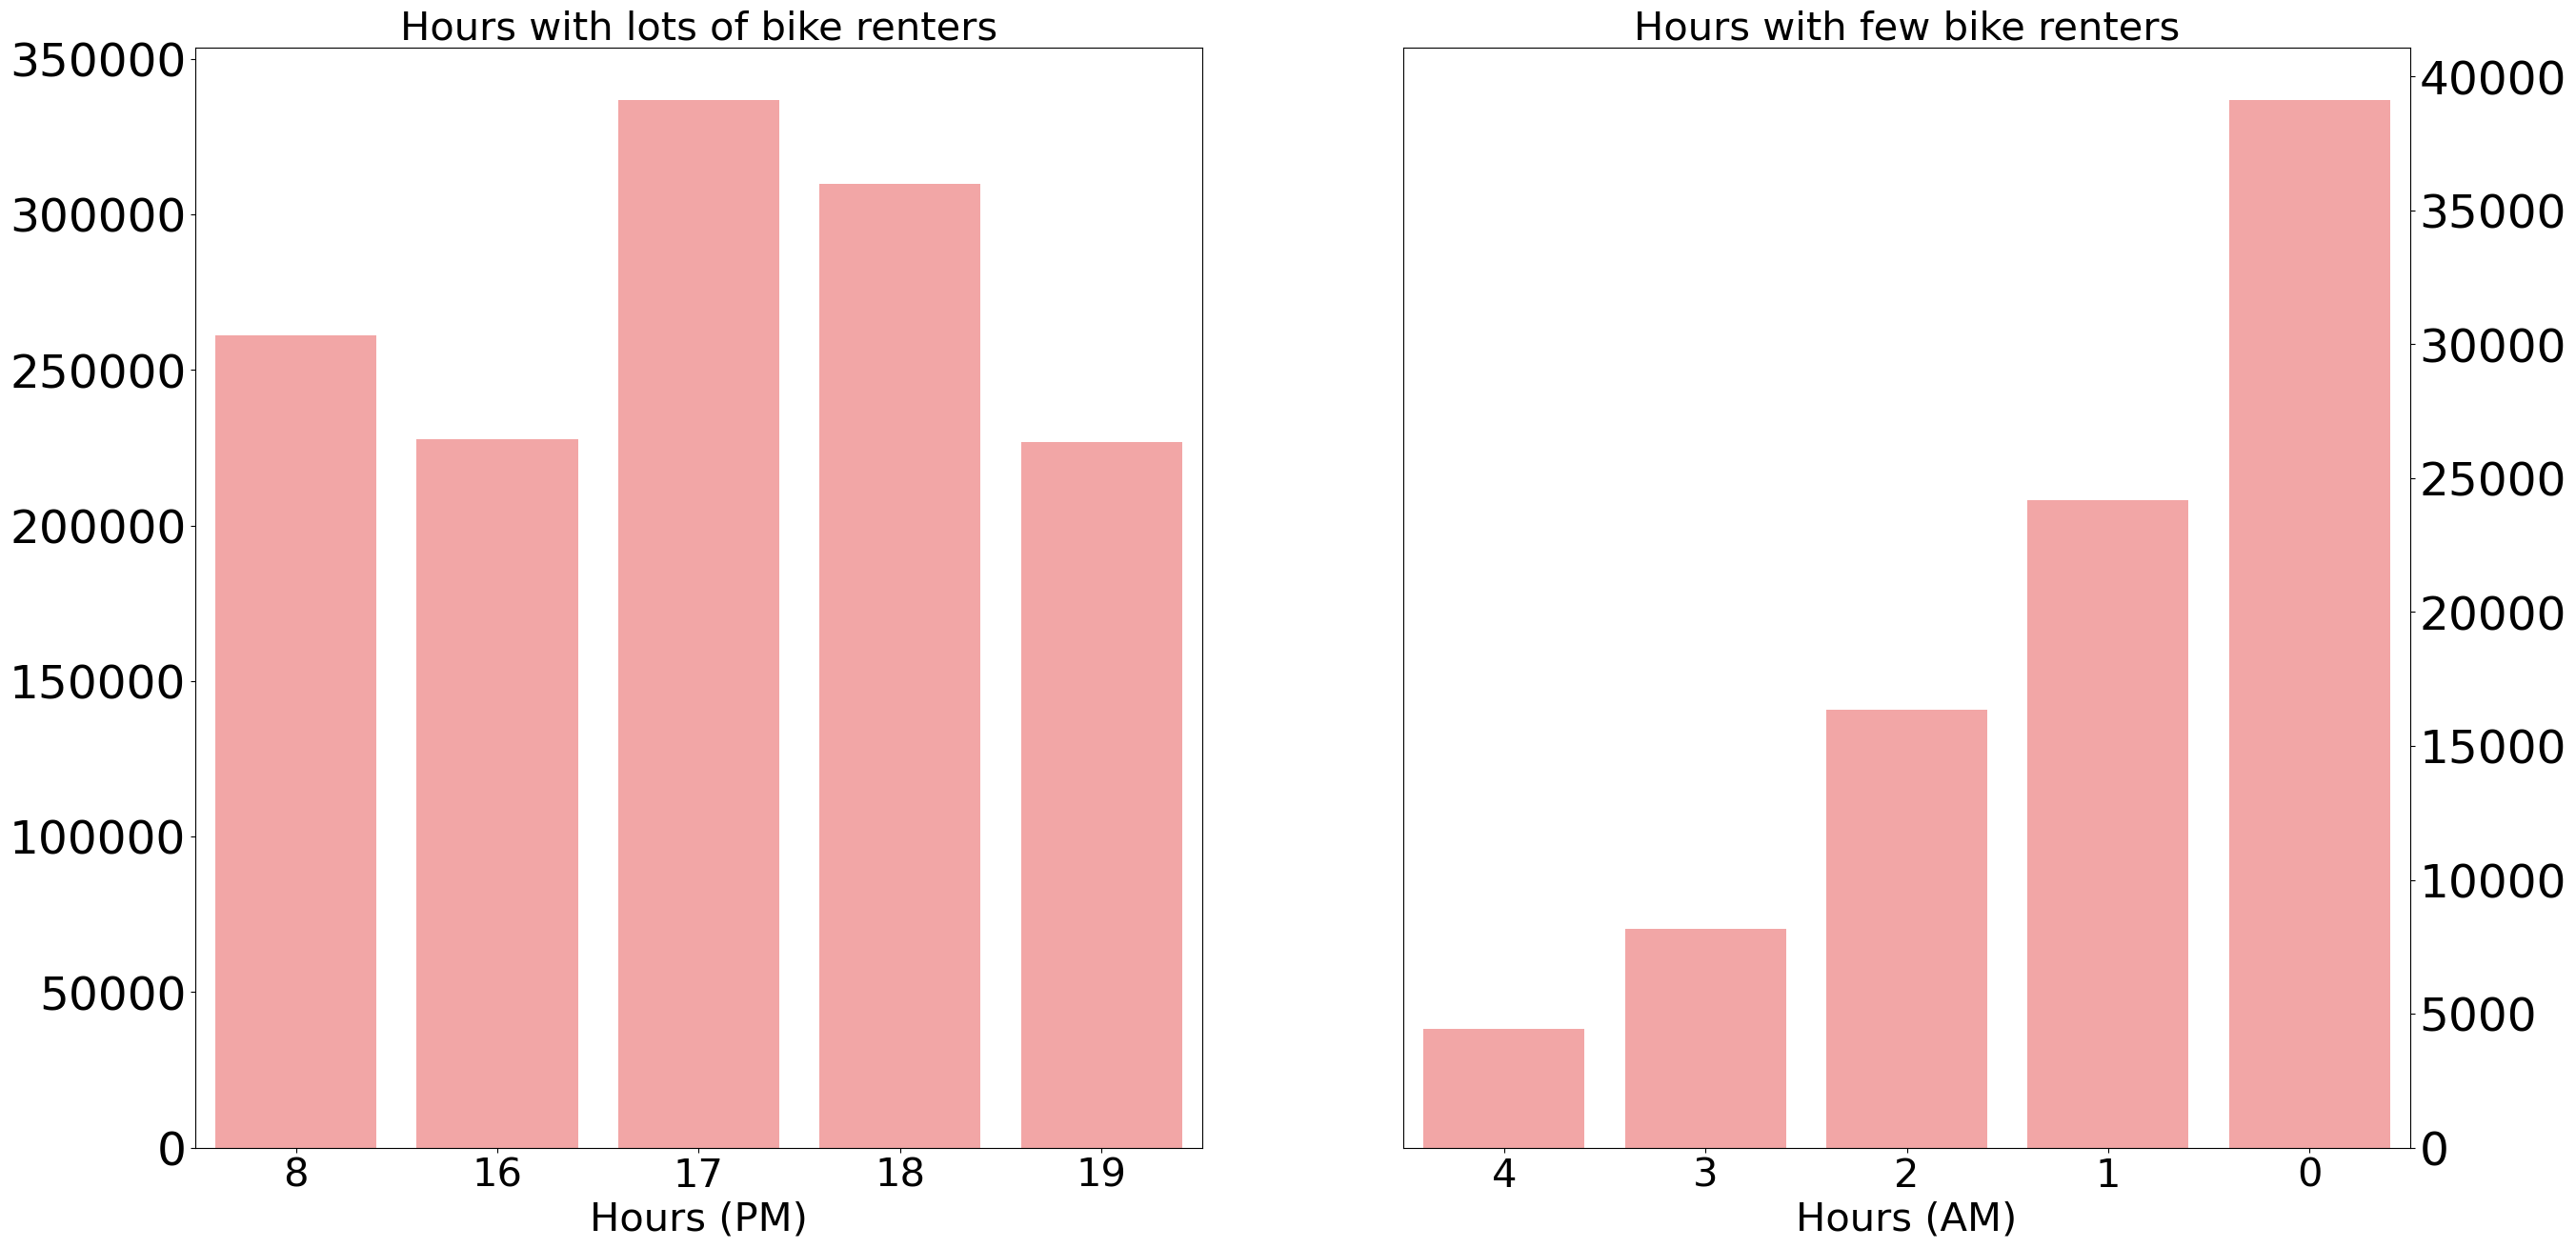

In [33]:
sum_order = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))
sns.barplot(
    x="hours", 
    y="count_cr", 
    data=sum_order.head(5), 
    ax=ax[0],
    color='#ff9999'
)

ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Hours with lots of bike renters", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(
    x="hours", 
    y="count_cr", 
    data=sum_order.sort_values(
        by="hours", 
        ascending=True
    ).head(5), 
    ax=ax[1],
    color='#ff9999'
)

ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Hours with few bike renters", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

plt.show()


### Question 2: In what season is bike rental peak?

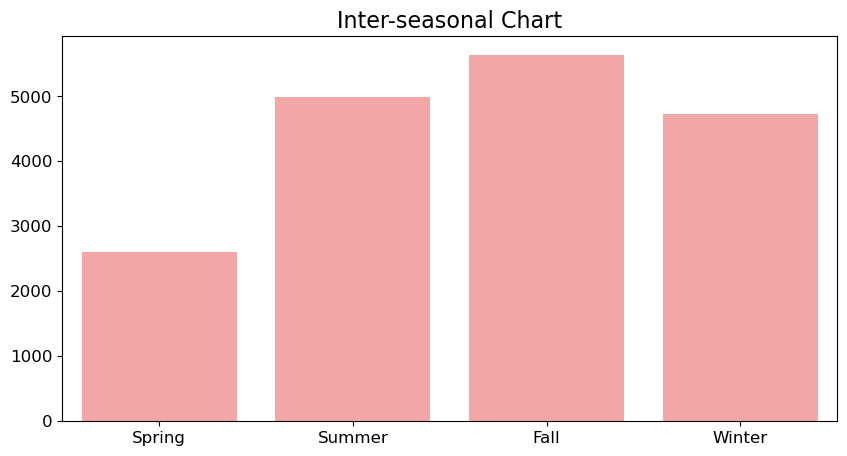

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    y="count_cr",
    x="season",
    data= day_df.sort_values(
        by="season",
        ascending=False
    ),
    ax=ax,
    errorbar=None,
    color='#ff9999'
)

ax.set_title("Inter-seasonal Chart", loc="center", fontsize=16)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

### Question 3: How has the company's sales performance been in recent years?

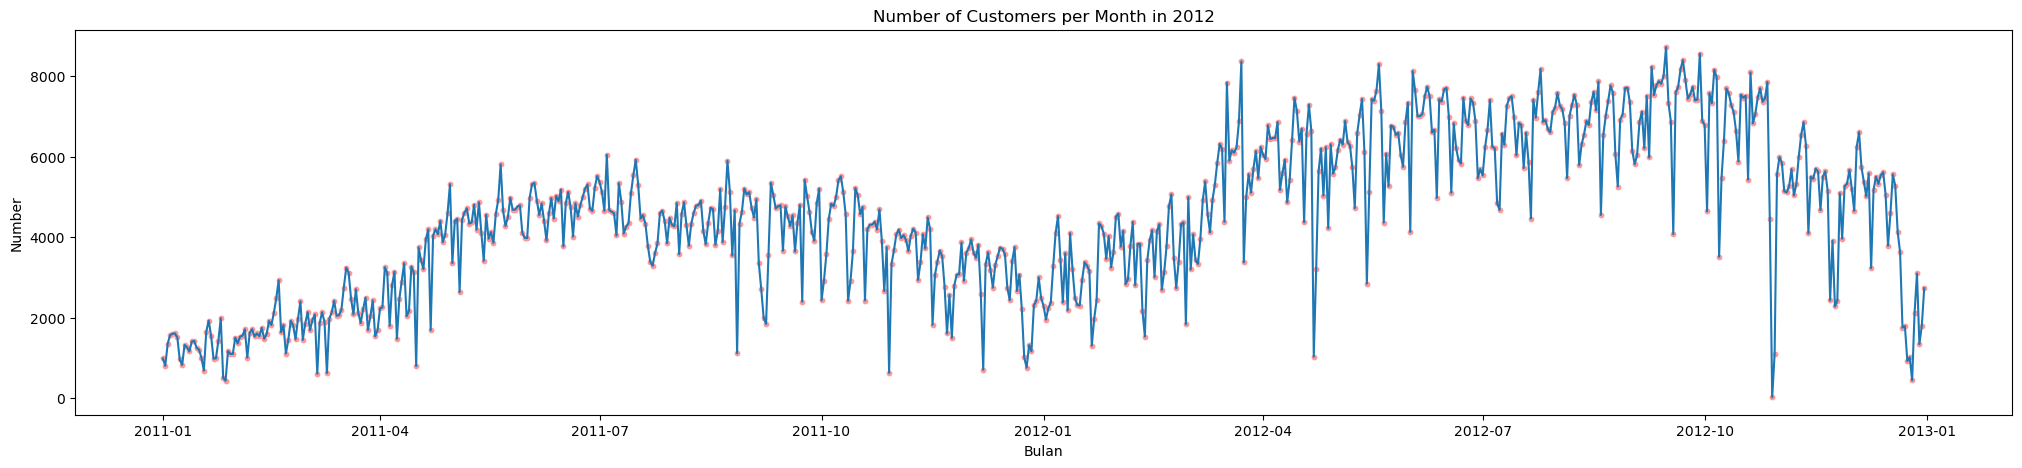

In [35]:
plt.figure(figsize=(25,5))

monthly_ct = day_df['count_cr'].groupby(day_df['dteday']).max()

plt.scatter(
    monthly_ct.index,
    monthly_ct.values,
    marker='o',
    color='#ff9999',
    s=10
)
plt.plot(monthly_ct.index,monthly_ct.values)
plt.xlabel('Bulan')
plt.ylabel('Number')
plt.title('Number of Customers per Month in 2012')

plt.show()

### Question 4: How do registered customers compare to casual customers?

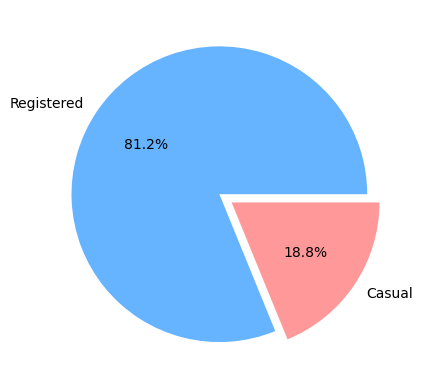

In [36]:
casual_total = sum(day_df['casual'])
total_regiter = sum(day_df['registered'])
data = [total_regiter, casual_total]
labels = ["Registered", "Casual"]
myexplode = [0, 0.1]
colors = [ '#66b3ff', '#ff9999']

plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, explode=myexplode)
plt.show()

## Conclusion

- **Question 1:** What are the most and least frequently rented hours?
- **Question 2:** In what season is bike rental peak?
- **Question 3:** How has the company's sales performance been in recent years?
- **Question 4:** How do registered customers compare to casual customers?

**Conclution pertanyaan 1:** Based on the image above, you can see that bike rentals are most used at 17:00. In contrast, rentals at 04:00 are the least sold products.

**conclution pertanyaan 2:** in the Fall season.

**conclution pertanyaan 3:** 
Based on the visualization above, we can see that the highest number of orders occured in September 2012,
we can also see significant decrease in the number of orders in January 2011

**conclution pertanyaan 4:** Those who have registered 81.2%, while those who have not registered (casual) are 18.8% 